In [1]:
import torch
import torch.nn as nn
import numpy as np
from PIL import Image #
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import save_image
import matplotlib.pyplot as plt

#from google.colab import drive # 구글드라이브 연결 라이브러리

In [2]:
#drive.mount('/content/drive') #구글 드라이브 연결

In [3]:
torch.manual_seed(777)
IMAGE_SIZE=128

device='cuda' if torch.cuda.is_available() else 'cpu'
if device=='cuda':
    torch.cuda.manual_seed_all(777)

In [4]:
original_datasets=ImageFolder(root='flower_photos/',
                              transform=transforms.Compose([
                                  transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                                  transforms.ToTensor()
                              ]))

In [5]:
print(original_datasets)

Dataset ImageFolder
    Number of datapoints: 2313
    Root location: flower_photos/
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [6]:
original_loader=DataLoader(original_datasets,
                           batch_size=2313,
                           shuffle=True,
                           drop_last=False,
                           num_workers=1) # 데이터 로시드 사용할 병렬 프로세스 수, 단일 프로세스 사용

In [7]:
for X, Y in original_loader:
    print(X.size(), Y.size())
    print(Y)
    break

torch.Size([2313, 3, 128, 128]) torch.Size([2313])
tensor([3, 0, 4,  ..., 4, 3, 2])


In [8]:
# 이미지 로더로 부터 이미지와 label을 추출
#total_batch=len(original_loader)
#print(total_batch)
#for i in range(total_batch):
original_images, labels=next(iter(original_loader)) 
#loader로부터 원래의 이미지로부터 새로운 이미지와 레이블 추출
print(original_images.shape)
print(labels.shape)

torch.Size([2313, 3, 128, 128])
torch.Size([2313])


In [9]:
print(labels[:10])

tensor([1, 3, 3, 0, 1, 3, 2, 2, 4, 3])


In [10]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#import matplotlib.pyplot as plt

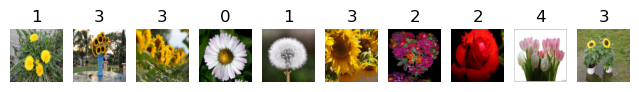

In [11]:
plt.figure(figsize=(8,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title(labels[i].item())
    plt.imshow(original_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

In [28]:
X1=original_images #3,128,128 : 채널, 행, 열
Y1=labels
print(X1.size(), Y1.size())

torch.Size([2313, 3, 128, 128]) torch.Size([2313])


In [12]:
Image_transform=transforms.Compose([
    transforms.Resize((256,256)),
    transforms.CenterCrop((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
])

In [24]:
transforms_datasets=ImageFolder(root='flower_photos/',
                                transform=Image_transform)
transforms_loader=DataLoader(transforms_datasets,
                             batch_size=1000, 
                             shuffle=True,
                             num_workers=1)

In [25]:
transforms_images, transforms_labels=next(iter(transforms_loader))

In [29]:
print(transforms_images.size(), transforms_labels.size())
X2=torch.cat([X1, transforms_images], dim=0)
Y2=torch.cat([Y1, transforms_labels],dim=0)
print(X2.size(), Y2.size())

torch.Size([1000, 3, 128, 128]) torch.Size([1000])
torch.Size([3313, 3, 128, 128]) torch.Size([3313])


In [20]:
none_datasets=ImageFolder(root='flower_photos/',
                                transform=transforms.Compose([
                                  transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                                  transforms.ToTensor()
                                  ]))
none_loader=DataLoader(none_datasets,
                             batch_size=100, 
                             shuffle=False,
                             num_workers=1)

In [21]:
none_images, none_labels=next(iter(none_loader))

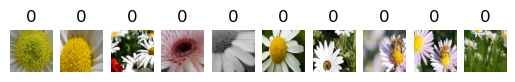

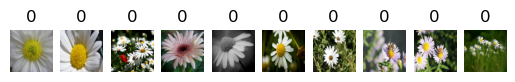

In [22]:
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title(transforms_labels[i].item())
    plt.imshow(transforms_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title(none_labels[i].item())
    plt.imshow(none_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

In [30]:
def create_loader(transform):
    transforms_datasets=ImageFolder(root='flower_photos',
                                    transform=transform)
    transform_loader=DataLoader(transforms_datasets,
                                batch_size=1000,
                                shuffle=True,
                                num_workers=1)
    
    transform_images, labels=next(iter(transform_loader))
    return transform_images, labels

In [34]:
Image_transform=transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ColorJitter(brightness=(0.7,0.9),
                           contrast=(1,1),
                           saturation=(0.7,0.9),
                           #hue=(-0.2,0.2)
                        ),
    transforms.ToTensor()                          
])
color_tf_images, color_tf_labels=create_loader(Image_transform)

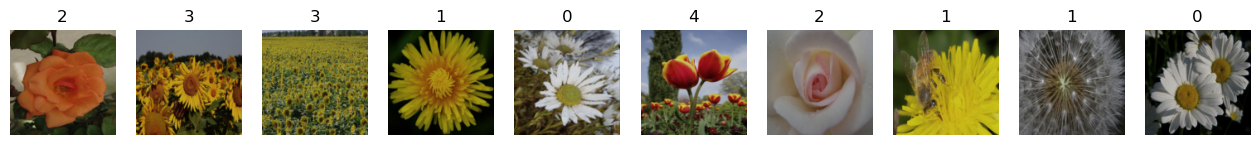

In [35]:
plt.figure(figsize=(16,4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title(color_tf_labels[i].item())
    plt.imshow(color_tf_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()

In [36]:
X3=torch.cat([X2, color_tf_images], dim=0)
Y3=torch.cat([Y2, color_tf_labels], dim=0)
print(X3.size(), Y3.size())

torch.Size([4313, 3, 128, 128]) torch.Size([4313])


In [37]:
image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    # RandomHorizontalFlip 적용
    transforms.RandomHorizontalFlip(p=0.8),  # 수평 뒤집기
    transforms.ToTensor()
])
flip_tf_images, flip_tf_labels=create_loader(image_transform)
X4=torch.cat([X3, flip_tf_images], dim=0)
Y4=torch.cat([Y3, flip_tf_labels],dim=0)
print(X4.size(), Y4.size())

torch.Size([5313, 3, 128, 128]) torch.Size([5313])


In [38]:
image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    # RandomRotation 적용
    transforms.RandomRotation(degrees=(-15, 15),
        interpolation=transforms.InterpolationMode.BILINEAR, fill=0),
    transforms.ToTensor()
])

rot_tf_images, rot_tf_labels=create_loader(image_transform)
X5=torch.cat([X4, rot_tf_images], dim=0)
Y5=torch.cat([Y4, rot_tf_labels], dim=0)
print(X5.size(), Y5.size())

torch.Size([6313, 3, 128, 128]) torch.Size([6313])


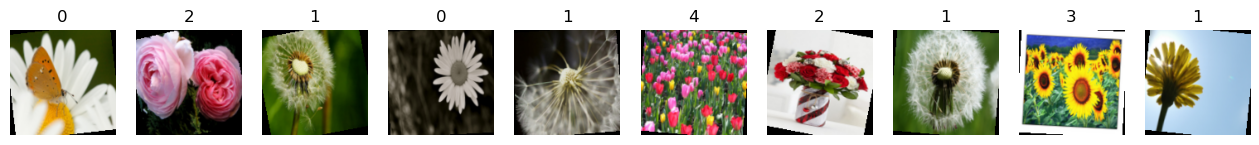

In [39]:
plt.figure(figsize=(16,4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title(rot_tf_labels[i].item())
    plt.imshow(rot_tf_images[i].permute(1,2,0))
    plt.axis('off')
plt.show()